In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, n_informative=2, random_state=1)
y = y.reshape(-1, 1)  # 3shan a8yer shakl target bta3y yb2a 3la hsb safof bta3ty (1000, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 3shan yb2a 0 w 1 (binary classification)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# a7sb loss 
def compute_loss(y_true, y_pred):
    eps = 1e-15  #mtb2ash=0
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [6]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000, optimizer='gd', batch_size=32):
        self.lr = lr
        self.epochs = epochs
        self.optimizer = optimizer
        self.batch_size = batch_size

    def fit(self, X, y):
        self.losses = []
        m, n = X.shape
        self.W = np.zeros((n, 1))
        self.b = 0

        for epoch in range(self.epochs):
            if self.optimizer == 'gd':  # Gradient Descent
                Z = np.dot(X, self.W) + self.b
                A = sigmoid(Z)
                loss = compute_loss(y, A)
                dW = np.dot(X.T, (A - y)) / m
                db = np.sum(A - y) / m
                self.W -= self.lr * dW
                self.b -= self.lr * db

            elif self.optimizer == 'sgd':  # Stochastic 
                for i in range(m):
                    xi = X[i:i+1]
                    yi = y[i:i+1]
                    zi = np.dot(xi, self.W) + self.b
                    ai = sigmoid(zi)
                    dW = np.dot(xi.T, (ai - yi))
                    db = ai - yi
                    self.W -= self.lr * dW
                    self.b -= self.lr * db
                Z = np.dot(X, self.W) + self.b
                A = sigmoid(Z)
                loss = compute_loss(y, A)


            elif self.optimizer == 'mini-batch':
                for i in range(0, m, self.batch_size):
                    X_batch = X[i:i+self.batch_size]
                    y_batch = y[i:i+self.batch_size]
                    Z = np.dot(X_batch, self.W) + self.b
                    A = sigmoid(Z)
                    dW = np.dot(X_batch.T, (A - y_batch)) / len(y_batch)
                    db = np.sum(A - y_batch) / len(y_batch)
                    self.W -= self.lr * dW
                    self.b -= self.lr * db
                Z = np.dot(X, self.W) + self.b
                A = sigmoid(Z)
                loss = compute_loss(y, A)

            self.losses.append(loss)

    def predict(self, X):
        Z = np.dot(X, self.W) + self.b
        return sigmoid(Z) >= 0.5

In [7]:
optimizers = ['gd', 'sgd', 'mini-batch']
for opt in optimizers:
    print(f"Using Optimizer: {opt}")
    model = LogisticRegression(lr=0.1, epochs=100, optimizer=opt)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("ـ"*30)
    

Using Optimizer: gd
Accuracy: 0.865
Precision: 0.8611111111111112
Recall: 0.8857142857142857
F1 Score: 0.8732394366197183
Confusion Matrix:
 [[80 15]
 [12 93]]
ــــــــــــــــــــــــــــــ
Using Optimizer: sgd
Accuracy: 0.855
Precision: 0.8584905660377359
Recall: 0.8666666666666667
F1 Score: 0.8625592417061612
Confusion Matrix:
 [[80 15]
 [14 91]]
ــــــــــــــــــــــــــــــ
Using Optimizer: mini-batch
Accuracy: 0.855
Precision: 0.8584905660377359
Recall: 0.8666666666666667
F1 Score: 0.8625592417061612
Confusion Matrix:
 [[80 15]
 [14 91]]
ــــــــــــــــــــــــــــــ


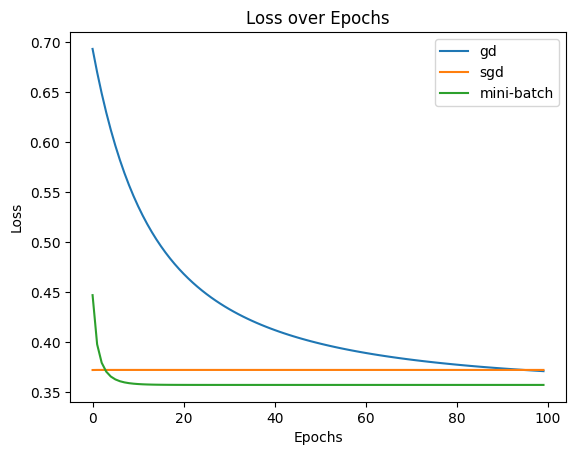

In [8]:
for opt in optimizers:
    model = LogisticRegression(lr=0.1, epochs=100, optimizer=opt)
    model.fit(X_train, y_train)
    plt.plot(model.losses, label=opt)

plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()